In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "../data/processed/ethiopia_fi_enriched.csv",
    parse_dates=["observation_date", "event_date"]
)

impact = df[df.record_type == "impact_link"] 
events = df[df.record_type == "event"]


In [6]:
impact = impact.merge(
    events[["record_id", "category", "event_date"]],
    left_on="parent_id",
    right_on="record_id",
    how="left"
)


In [7]:
matrix = impact.pivot_table(
    index="parent_id",
    columns="related_indicator",
    values="impact_magnitude",
    aggfunc="mean"
)

matrix


related_indicator,ACC_OWNERSHIP
parent_id,
EVENT_FAYDA_ID,1.5


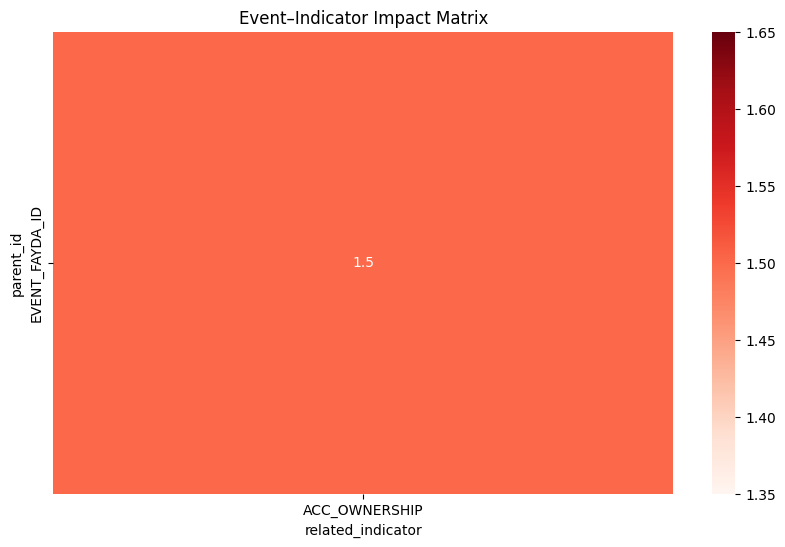

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(matrix.fillna(0), cmap="Reds", annot=True)
plt.title("Event–Indicator Impact Matrix")
plt.show()


In [10]:
from statsmodels.api import OLS, add_constant
# 2. Ensure datetime conversion 
df["observation_date"] = pd.to_datetime(df["observation_date"], errors="coerce") 
# # 3. Define obs subset 
obs = df[df.record_type == "observation"].copy()
acc = obs[obs.indicator_code == "ACC_OWNERSHIP"].copy()
acc["t"] = range(len(acc))

# Telebirr dummy
acc["telebirr"] = (acc.observation_date >= "2021-05-01").astype(int)

X = add_constant(acc[["t", "telebirr"]])
y = acc.value_numeric

model = OLS(y, X).fit()
model.summary()


c:\Users\azeb.mehrete\Documents\KAIM\KAIM-10\w10env\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          value_numeric   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     2.289
Date:                Mon, 02 Feb 2026   Prob (F-statistic):              0.249
Time:                        14:07:58   Log-Likelihood:                -20.159
No. Observations:                   6   AIC:                             46.32
Df Residuals:                       3   BIC:                             45.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.4091      7.275      3.905      0.030       5.258      51.560
t              0.1818      4.200      0.043      0.968     -13.185      13.548
telebirr      17.7045     15.216      1.164      0.329     -30.720      66.129
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.022
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.436
Skew:                          -0.223   Prob(JB):                        0.804
Kurtosis:                       1.757   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

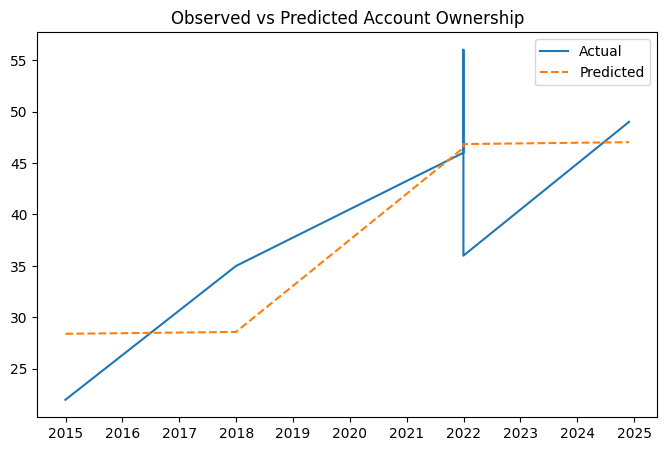

In [11]:
pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.plot(acc.observation_date, y, label="Actual")
plt.plot(acc.observation_date, pred, label="Predicted", linestyle="--")
plt.legend()
plt.title("Observed vs Predicted Account Ownership")
plt.show()
